# Example of RC beam optimal design

## Requirements

 - python3
 - cma python package: install via pip https://pypi.org/project/cma/#description


In [20]:
# problem: rectangular cross-section beam
b0 = .1 # thickness
h0 = .8  # height

rec = 0.03

L = 5 # length
    
gamma = 25e3 # specific weight of concrete
qsc = 50e3    # N/m load

fck = 25e6
fyk = 400e6
                  

In [21]:
# import CMA-ES package
import cma
from math import sqrt

In [22]:
def structAnalysis(x):
    b = x[0]
    h = x[1]
    qpp = b * h * gamma
    Moment = (qsc + qpp) * L**2.0 / 8.0
    return Moment

In [23]:
def steelDesign(x,M):
    fcd = fck/1.5
    fyd = fyk/1.15
      
    b = x[0]
    h = x[1]
    d = h-rec

    Md   = M
    Mcrd = 0.251 * b * d**2 * fcd
    
    if Md < Mcrd:
        mud = Md/(b*d**2*fcd)
        omega_pos = (-1+sqrt(1-4*(-1/1.7)*(-mud)) ) / (2*(-1/1.7))
        omega_neg = 0.85*(1-sqrt(1-4/1.7*mud))
        #omega_neg = (-1-sqrt(1-4*(-1/1.7)*(-mud)) ) / (2*(-1/1.7))
        omega = omega_neg 

        Ast = omega * b * d * fcd / fyd
        Asc = 0.0
    else:
        DeltaM = Md - Mcrd
        print("deltaM: ", DeltaM)
        Asc = DeltaM / ( (d-rec)*fyd )
        Ast = 0.306 * b * d * fcd / fyd + Asc 
    return Ast, Asc

In [24]:
def costFun(x):
    
    M = structAnalysis(x)
    
    # compute steel area
    Ast, Asc = steelDesign( x, M)
    
    print("x: ", x, " / Ast: ", Ast , " Asc: ", Asc)

    # compute cost function
    f = L * ( Ast + Asc ) * 7850 * 1 + 400 * x[0]*x[1] * L  
    print("funcional: " , f)
    return f

In [25]:
x0 = [.1, 0.6]  # initial solution
costFun(x0)

x0 = [.1, .65]  # initial solution
costFun(x0)

x0 = [.1, 0.675]  # initial solution
costFun(x0)

x0 = [.1, 0.7]  # initial solution
costFun(x0)



deltaM:  25021.00000000003
x:  [0.1, 0.6]  / Ast:  0.0009689761574074075  Asc:  0.00013321365740740756
funcional:  163.26095023148147
deltaM:  520.791666666657
x:  [0.1, 0.65]  / Ast:  0.000911612756002825  Asc:  2.537756002824812e-06
funcional:  165.88040759622174
x:  [0.1, 0.675]  / Ast:  0.0008610946543847797  Asc:  0.0
funcional:  168.79796518460262
x:  [0.1, 0.7]  / Ast:  0.0008159218997382471  Asc:  0.0
funcional:  172.0249345647262


172.0249345647262

In [26]:

x0 = [b0, h0]  # initial solution

M=structAnalysis(x0)
print("moment: ", M)

Ast,Asc = steelDesign(x0,M)
print("Steel: Ast: ", Ast , " Asc: ", Asc)

fun = costFun  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
sigma0 = .02    # initial standard deviation to sample new solutions
xopt, es = cma.fmin2(fun, x0, sigma0, {'bounds': [ [.1, .1], None]} )

moment:  162500.0
Steel: Ast:  0.0006805849651165914  Asc:  0.0
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=203160, Wed May  3 20:36:07 2023)
x:  [0.10047146 0.82807738]  / Ast:  0.000651219176975172  Asc:  0.0
funcional:  191.95664453516048
x:  [0.10165978 0.82289789]  / Ast:  0.0006557383919735318  Asc:  0.0
funcional:  193.04897375544323
x:  [0.10222729 0.81491269]  / Ast:  0.0006635110749945095  Asc:  0.0
funcional:  192.65543980179615
x:  [0.10000678 0.82378375]  / Ast:  0.0006557253461376614  Asc:  0.0
funcional:  190.50514775399324
x:  [0.10040841 0.78250151]  / Ast:  0.0007000412320833933  Asc:  0.0
funcional:  184.61607982169778
x:  [0.1002693  0.80368361]  / Ast:  0.0006764233113523292  Asc:  0.0
funcional:  187.71919700785296
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 1.846160798216978e+02 1.0e+00 1.65e-02  1e-02  2e-02 0:00.0
x:  [0.10001666 0.77626941]  / Ast:  0.0007076937019379136  Asc:  0.0
funcional:  183.0567296285

deltaM:  57822.5436153991
x:  [0.1        0.52506618]  / Ast:  0.0010833448876940725  Asc:  0.0003574540989721078
funcional:  161.56459653995907
termination on tolfun=1e-11 (Wed May  3 20:36:07 2023)
final/bestever f-value = 1.615646e+02 1.615646e+02 after 553/511 evaluations
incumbent solution: [0.10000000000000002, 0.5250661815665574]
std deviation: [1.7341804247041694e-09, 9.331146437676435e-09]


In [27]:
dict(es.result._asdict())

{'xbest': array([0.1       , 0.52506618]),
 'fbest': 161.564596539959,
 'evals_best': 511,
 'evaluations': 553,
 'iterations': 92,
 'xfavorite': array([0.1       , 0.52506618]),
 'stds': array([1.73418042e-09, 9.33114644e-09]),
 'stop': {'tolfun': 1e-11}}

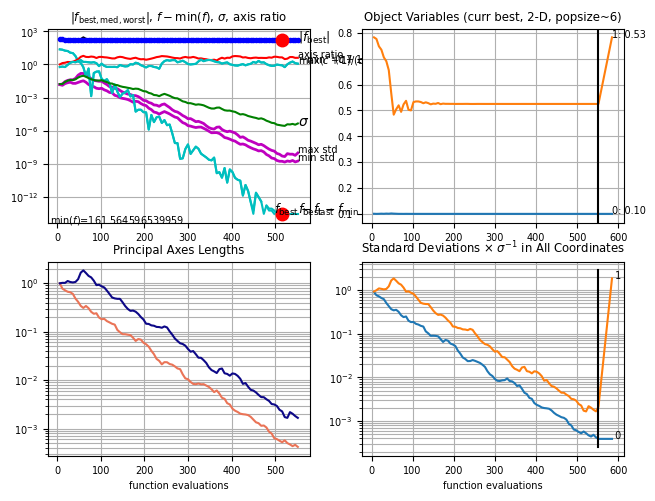

In [28]:
es.plot();

In [29]:
import numpy as np
import matplotlib.pyplot as plt
num_b = 30
num_h = 40

blist = np.linspace( 0.1, 0.2, num_b )
hlist = np.linspace( 0.1, 0.8, num_h )
B, H = np.meshgrid(blist, hlist)
np.shape(B)
Costs = np.zeros( (num_h, num_b) )
for j in range(num_b):
    for i in range(num_h):
        Costs[i,j]= costFun( [B[i,j],H[i,j]])

        

deltaM:  154981.41666666666
x:  [0.1, 0.1]  / Ast:  0.011241926822916665  Asc:  0.011139289322916664
funcional:  898.4627337239581
deltaM:  153935.67565198336
x:  [0.1, 0.11794871794871796]  / Ast:  0.007766139600824445  Asc:  0.007637184793132137
funcional:  628.1702260525394
deltaM:  152620.3970523778
x:  [0.1, 0.13589743589743591]  / Ast:  0.005936543067917676  Asc:  0.00578127095253306
funcional:  487.1036874821785
deltaM:  151035.58086785008
x:  [0.1, 0.15384615384615385]  / Ast:  0.004808601582860444  Asc:  0.004627012159783521
funcional:  401.1170701680065
deltaM:  149181.22709840018
x:  [0.1, 0.1717948717948718]  / Ast:  0.0040443620262756805  Asc:  0.0038364552955064495
funcional:  343.68105423892297
deltaM:  147057.33574402807
x:  [0.1, 0.18974358974358976]  / Ast:  0.00349288091006216  Asc:  0.0032586568716006215
funcional:  302.9465758789821
deltaM:  144663.90680473374
x:  [0.1, 0.2076923076923077]  / Ast:  0.0030765900528345346  Asc:  0.0028160487066806886
funcional:  272.

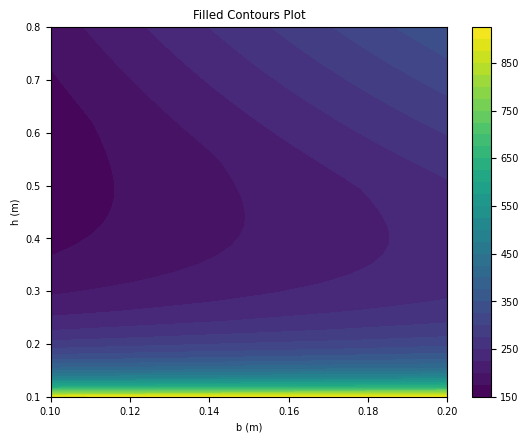

In [30]:

fig,ax=plt.subplots(1,1)
cp = ax.contourf(B, H, Costs,30)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('b (m)')
ax.set_ylabel('h (m)')
plt.show()